In [16]:
import pandas as pd

In [17]:
file_path = r"C:\Users\ranan\OneDrive\Desktop\Mycotoxin_prediction\Mycotoxin_prediction\notebooks_Mycotoxin_prediction\preprocessed_data.csv"
Preprocess_data = pd.read_csv(file_path)


print(Preprocess_data.head())

           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.345438  0.310090  0.394223  0.251399  0.398736  0.305281   
1  imagoai_corn_1  0.343642  0.343102  0.361750  0.370324  0.459555  0.428765   
2  imagoai_corn_3  0.591439  0.722757  0.667119  0.695627  0.789142  0.786269   
3  imagoai_corn_4  0.659254  0.798466  0.698497  0.841081  0.801174  0.742100   
4  imagoai_corn_5  0.285379  0.322084  0.310404  0.358286  0.350106  0.325346   

          6         7         8  ...       439       440       441       442  \
0  0.312942  0.191602  0.311981  ...  0.429096  0.451927  0.470823  0.402165   
1  0.415371  0.304730  0.458708  ...  0.312765  0.362503  0.408710  0.363086   
2  0.828790  0.660989  0.668232  ...  0.573032  0.510855  0.573888  0.505786   
3  0.828963  0.733552  0.722954  ...  0.694572  0.697621  0.690884  0.646289   
4  0.369343  0.394920  0.233207  ...  0.398232  0.366243  0.379284  0.368407   

        443       444       445 

In [18]:
New_Preprocess_data = Preprocess_data.drop(columns=['hsi_id'])


In [19]:
New_Preprocess_data.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.345438,0.310090,0.394223,0.251399,0.398736,0.305281,0.312942,0.191602,0.311981,0.433500,...,0.429096,0.451927,0.470823,0.402165,0.376092,0.302376,0.420757,0.306291,0.373014,0.185059
1,0.343642,0.343102,0.361750,0.370324,0.459555,0.428765,0.415371,0.304730,0.458708,0.423714,...,0.312765,0.362503,0.408710,0.363086,0.395886,0.227467,0.351567,0.300883,0.304984,0.168081
2,0.591439,0.722757,0.667119,0.695627,0.789142,0.786269,0.828790,0.660989,0.668232,0.699972,...,0.573032,0.510855,0.573888,0.505786,0.626873,0.525060,0.569569,0.577807,0.500380,0.219015
3,0.659254,0.798466,0.698497,0.841081,0.801174,0.742100,0.828963,0.733552,0.722954,0.789814,...,0.694572,0.697621,0.690884,0.646289,0.677426,0.551931,0.727788,0.605323,0.581819,0.035654
4,0.285379,0.322084,0.310404,0.358286,0.350106,0.325346,0.369343,0.394920,0.233207,0.261548,...,0.398232,0.366243,0.379284,0.368407,0.367964,0.252907,0.250799,0.296543,0.328327,0.235993


Selected Features (SelectKBest): ['41', '43', '49', '50', '51', '52', '54', '55', '60', '64', '71', '72', '75', '79', '81']
Selected Features (Random Forest): ['81', '144', '83', '50', '70', '41', '52', '39', '84', '151', '223', '426', '389', '78', '126']

Final Selected Features Before VIF Check: ['151', '75', '426', '126', '64', '81', '60', '72', '144', '389', '84', '51', '54', '43', '79', '55', '39', '49', '52', '70', '50', '41', '78', '223', '71', '83']
Removing feature 144 with VIF=178.88
Removing feature 389 with VIF=128.22
Removing feature 151 with VIF=112.34

Final Features After VIF Check: ['75', '426', '126', '64', '81', '60', '72', '84', '51', '54', '43', '79', '55', '39', '49', '52', '70', '50', '41', '78', '223', '71', '83']


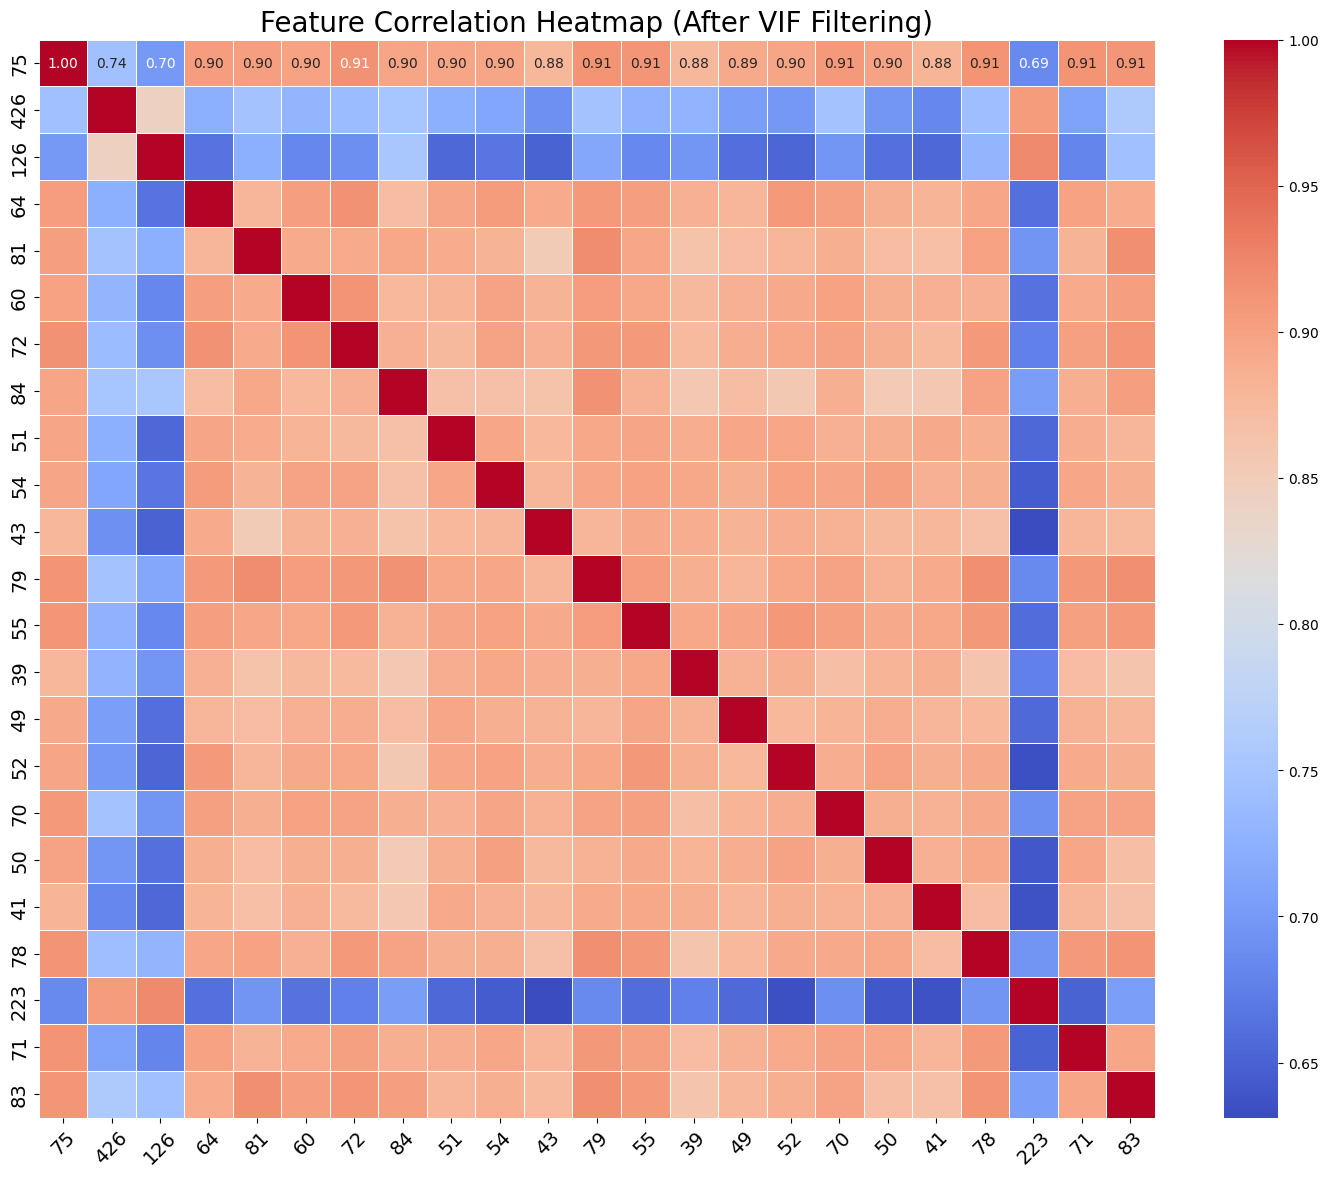

Final dataset shape: Train=(268, 23), Test=(67, 23)


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# Load preprocessed dataset (replace with actual dataset)
# Ensure `New_Preprocess_data` is loaded
X = New_Preprocess_data.drop(columns=["vomitoxin_ppb"])  # Drop target column
y = New_Preprocess_data["vomitoxin_ppb"]  # Target variable

### --- METHOD 1: SelectKBest (F-Test) --- ###
k = min(15, X.shape[1])  # Select the top 15 features or all if fewer
selector = SelectKBest(score_func=f_regression, k=k)
X_kbest = selector.fit_transform(X, y)
selected_kbest_features = X.columns[selector.get_support()]
print("Selected Features (SelectKBest):", selected_kbest_features.tolist())

### --- METHOD 2: Random Forest Feature Importance --- ###
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort by importance
selected_rf_features = X.columns[sorted_idx[:15]]  # Select top 15 features
print("Selected Features (Random Forest):", selected_rf_features.tolist())

### --- COMBINE SELECTED FEATURES FROM BOTH METHODS --- ###
final_selected_features = set(selected_kbest_features) | set(selected_rf_features)
final_selected_features = list(final_selected_features)
print("\nFinal Selected Features Before VIF Check:", final_selected_features)

# Create new dataset with selected features
X_selected = X[final_selected_features]

### --- FUNCTION TO REMOVE HIGH VIF FEATURES --- ###
def remove_high_vif_features(X_selected, threshold=100, min_features=10):
    """
    Removes features with high VIF, ensuring at least `min_features` remain.
    Adjusts threshold dynamically if too many features are removed.
    """
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X_selected.columns
        vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
        
        # Check if we have enough features left
        if len(X_selected.columns) <= min_features:
            print("Stopping VIF removal to retain enough features.")
            break

        # Find the max VIF
        max_vif = vif_data["VIF"].max()
        if max_vif < threshold:
            break  # Stop if all VIF values are below the threshold
        
        # Remove the feature with the highest VIF
        feature_to_remove = vif_data.sort_values(by="VIF", ascending=False).iloc[0]["Feature"]
        X_selected = X_selected.drop(columns=[feature_to_remove])
        print(f"Removing feature {feature_to_remove} with VIF={max_vif:.2f}")

    return X_selected, vif_data

# Apply VIF filtering
X_selected_vif, final_vif = remove_high_vif_features(X_selected)

# Final feature list after VIF filtering
final_feature_list = X_selected_vif.columns.tolist()
print("\nFinal Features After VIF Check:", final_feature_list)

### --- SAVE FINAL FEATURES --- ###
df_selected = pd.DataFrame(X_selected_vif)
df_selected["vomitoxin_ppb"] = y  # Add target column
df_selected.to_csv("new_final_selected_features_after_vif.csv", index=False)

### --- CORRELATION HEATMAP FOR FINAL FEATURES --- ###
plt.figure(figsize=(18, 14))  # Larger heatmap size
sns.heatmap(X_selected_vif.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (After VIF Filtering)", fontsize=20)
plt.xticks(fontsize=14, rotation=45)  # Rotate x labels for better readability
plt.yticks(fontsize=14)
plt.show()

### --- SPLITTING DATA FOR MODEL TRAINING --- ###
X_train, X_test, y_train, y_test = train_test_split(X_selected_vif, y, test_size=0.2, random_state=42)
print(f"Final dataset shape: Train={X_train.shape}, Test={X_test.shape}")


In [21]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


pip install numpy keras


In [22]:
pip install numpy keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
3 + 4

7

In [23]:
pip install tensorflow keras optuna xgboost lightgbm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define Neural Network Model
def build_nn(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Initialize Model
nn_model = build_nn(X_train.shape[1])

# Train Model
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=100, batch_size=16, verbose=1)

# Evaluate Model
nn_loss, nn_mae = nn_model.evaluate(X_test, y_test)
print(f"Neural Network MAE: {nn_mae}")


C:\Users\ranan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0790 - mae: 0.2087 - val_loss: 0.0865 - val_mae: 0.1783
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0541 - mae: 0.1631 - val_loss: 0.0597 - val_mae: 0.2102
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0610 - mae: 0.1960 - val_loss: 0.0599 - val_mae: 0.1817
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0456 - mae: 0.1495 - val_loss: 0.0590 - val_mae: 0.1821
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0494 - mae: 0.1618 - val_loss: 0.0569 - val_mae: 0.1853
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0574 - mae: 0.1755 - val_loss: 0.0605 - val_mae: 0.1696
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0596 - mae: 0.1849 - val_loss: 0.0602 - val_mae: 0.1678
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0511 - mae: 0.1538 - val_loss: 0.0539 - val_mae: 0.1783
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0

In [2]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load processed data
df = pd.read_csv("new_final_selected_features_after_vif.csv")
X = df.drop(columns=["vomitoxin_ppb"])
y = df["vomitoxin_ppb"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    metrics[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Improved Neural Network Model
def build_nn():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

nn_model = build_nn()
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()
nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
nn_r2 = r2_score(y_test, y_pred_nn)
results["NeuralNetwork"] = nn_r2
metrics["NeuralNetwork"] = {"MAE": nn_mae, "RMSE": nn_rmse, "R2": nn_r2}
print(f"Neural Network - MAE: {nn_mae:.4f}, RMSE: {nn_rmse:.4f}, R2: {nn_r2:.4f}")

# Select best model
best_model_name = max(results, key=results.get)
best_model = models.get(best_model_name, None)

if best_model_name == "NeuralNetwork":
    best_model = nn_model
    best_model.save("best_nn_model.h5")
    print("Best Neural Network model saved as best_nn_model.h5")
else:
    print(f"Best Model: {best_model_name}")
    
    # Hyperparameter tuning using Optuna
    def objective(trial):
        if best_model_name == "RandomForest":
            n_estimators = trial.suggest_int("n_estimators", 100, 500, step=50)
            max_depth = trial.suggest_int("max_depth", 10, 50, step=5)
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        elif best_model_name == "GradientBoosting":
            n_estimators = trial.suggest_int("n_estimators", 100, 500, step=50)
            learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05)
            model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        else:
            return 0  # Skip other models for now
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return r2_score(y_test, y_pred)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)
    best_params = study.best_params
    print("Best Parameters:", best_params)

    # Train best model with optimized hyperparameters
    if best_model_name == "RandomForest":
        best_model = RandomForestRegressor(**best_params, random_state=42)
    elif best_model_name == "GradientBoosting":
        best_model = GradientBoostingRegressor(**best_params, random_state=42)
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    final_mae = mean_absolute_error(y_test, y_pred)
    final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    final_r2 = r2_score(y_test, y_pred)
    
    print(f"Final Best Model ({best_model_name}) Performance:\nMAE: {final_mae:.4f}, RMSE: {final_rmse:.4f}, R2: {final_r2:.4f}")
    
    # Save best model
    joblib.dump(best_model, "best_model.pkl")
    print("Best model saved as best_model.pkl")


RandomForest - MAE: 0.1515, RMSE: 0.2187, R2: 0.2704
GradientBoosting - MAE: 0.1492, RMSE: 0.2368, R2: 0.1448
Ridge - MAE: 0.1607, RMSE: 0.2152, R2: 0.2937
Lasso - MAE: 0.1665, RMSE: 0.2157, R2: 0.2903
SVR - MAE: 0.1469, RMSE: 0.2146, R2: 0.2978
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-16 10:41:24,075] A new study created in memory with name: no-name-1714b36a-1cd2-484b-abde-3423f8f5e67c
[I 2025-03-16 10:41:24,076] Trial 0 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:41:24,076] Trial 1 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:41:24,077] Trial 2 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:41:24,077] Trial 3 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:41:24,079] Trial 4 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:41:24,080] Trial 5 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:41:24,081] Trial 6 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:41:24,082] Trial 7 finished with value: 0.0 and parameters: {}. Best is

Neural Network - MAE: 0.1603, RMSE: 0.2270, R2: 0.2138
Best Model: SVR
Best Parameters: {}
Final Best Model (SVR) Performance:
MAE: 0.1469, RMSE: 0.2146, R2: 0.2978
Best model saved as best_model.pkl


RandomForest - MAE: 0.1533, RMSE: 0.2192, R2: 0.2670
GradientBoosting - MAE: 0.1520, RMSE: 0.2357, R2: 0.1525
Ridge - MAE: 0.1608, RMSE: 0.2154, R2: 0.2920
Lasso - MAE: 0.1612, RMSE: 0.2109, R2: 0.3215
SVR - MAE: 0.1578, RMSE: 0.2269, R2: 0.2149
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


[I 2025-03-16 10:46:06,739] A new study created in memory with name: no-name-b75af901-b9a1-421d-ba73-8d6491121f9c
[I 2025-03-16 10:46:06,740] Trial 0 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:46:06,740] Trial 1 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:46:06,741] Trial 2 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:46:06,742] Trial 3 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:46:06,742] Trial 4 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:46:06,743] Trial 5 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:46:06,744] Trial 6 finished with value: 0.0 and parameters: {}. Best is trial 0 with value: 0.0.
[I 2025-03-16 10:46:06,746] Trial 7 finished with value: 0.0 and parameters: {}. Best is

Neural Network - MAE: 0.1425, RMSE: 0.2262, R2: 0.2197
Best Model: Lasso
Best Parameters: {}
Best model saved as best_model.pkl


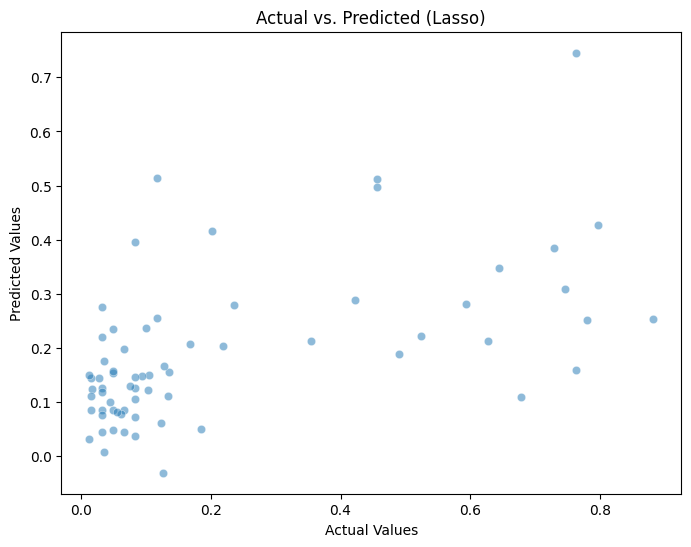

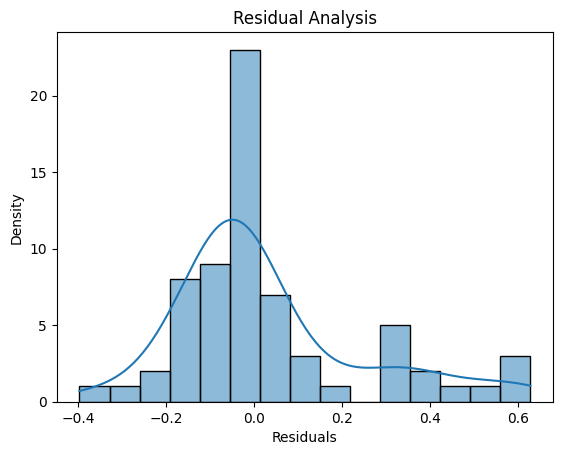

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR()

In [32]:
import numpy as np
import pandas as pd
import optuna
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load processed data
df = pd.read_csv("new_final_selected_features_after_vif.csv")
X = df.drop(columns=["vomitoxin_ppb"])
y = df["vomitoxin_ppb"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "RandomForest": RandomForestRegressor(n_estimators=300, max_depth=25, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=12, random_state=42),
    "Ridge": Ridge(alpha=0.5),
    "Lasso": Lasso(alpha=0.005),
    "SVR": SVR(kernel='rbf', C=2.0, epsilon=0.05)
}

# Perform k-fold cross-validation
results = {}
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    metrics[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Improved Neural Network Model
def build_nn():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return model

nn_model = build_nn()
nn_model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()
nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
nn_r2 = r2_score(y_test, y_pred_nn)
results["NeuralNetwork"] = nn_r2
metrics["NeuralNetwork"] = {"MAE": nn_mae, "RMSE": nn_rmse, "R2": nn_r2}
print(f"Neural Network - MAE: {nn_mae:.4f}, RMSE: {nn_rmse:.4f}, R2: {nn_r2:.4f}")

# Select best model
best_model_name = max(results, key=results.get)

if best_model_name == "NeuralNetwork":
    nn_model.save("best_nn_model.h5")
    print("Best Neural Network model saved as best_nn_model.h5")
else:
    print(f"Best Model: {best_model_name}")
    
    def objective(trial):
        if best_model_name == "RandomForest":
            n_estimators = trial.suggest_int("n_estimators", 200, 500, step=50)
            max_depth = trial.suggest_int("max_depth", 15, 50, step=5)
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        elif best_model_name == "GradientBoosting":
            n_estimators = trial.suggest_int("n_estimators", 200, 500, step=50)
            learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2, step=0.02)
            model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        else:
            return 0
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return r2_score(y_test, y_pred)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=40)
    best_params = study.best_params
    print("Best Parameters:", best_params)

    if best_model_name == "RandomForest":
        best_model = RandomForestRegressor(**best_params, random_state=42)
    elif best_model_name == "GradientBoosting":
        best_model = GradientBoostingRegressor(**best_params, random_state=42)
    
    best_model.fit(X_train, y_train)
    joblib.dump(best_model, "best_model.pkl")
    print("Best model saved as best_model.pkl")

# Visual Evaluation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_model.predict(X_test), alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted ({best_model_name})")
plt.show()

# Residual Analysis
residuals = y_test - best_model.predict(X_test)
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Analysis")
plt.show()

# Model Interpretability using SHAP
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

RandomForest - MAE: 0.1533, RMSE: 0.2192, R2: 0.2670
GradientBoosting - MAE: 0.1520, RMSE: 0.2357, R2: 0.1525
Ridge - MAE: 0.1608, RMSE: 0.2154, R2: 0.2920
Lasso - MAE: 0.1612, RMSE: 0.2109, R2: 0.3215
SVR - MAE: 0.1578, RMSE: 0.2269, R2: 0.2149
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Neural Network - MAE: 0.1590, RMSE: 0.2335, R2: 0.1682
Best Model: Lasso
Best model saved as best_model.pkl


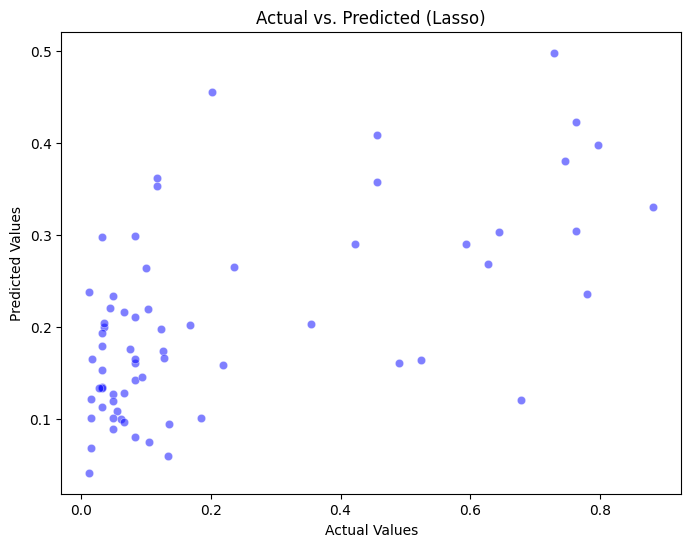

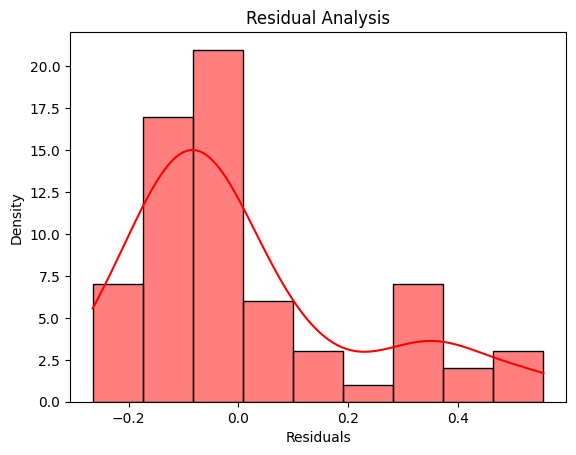

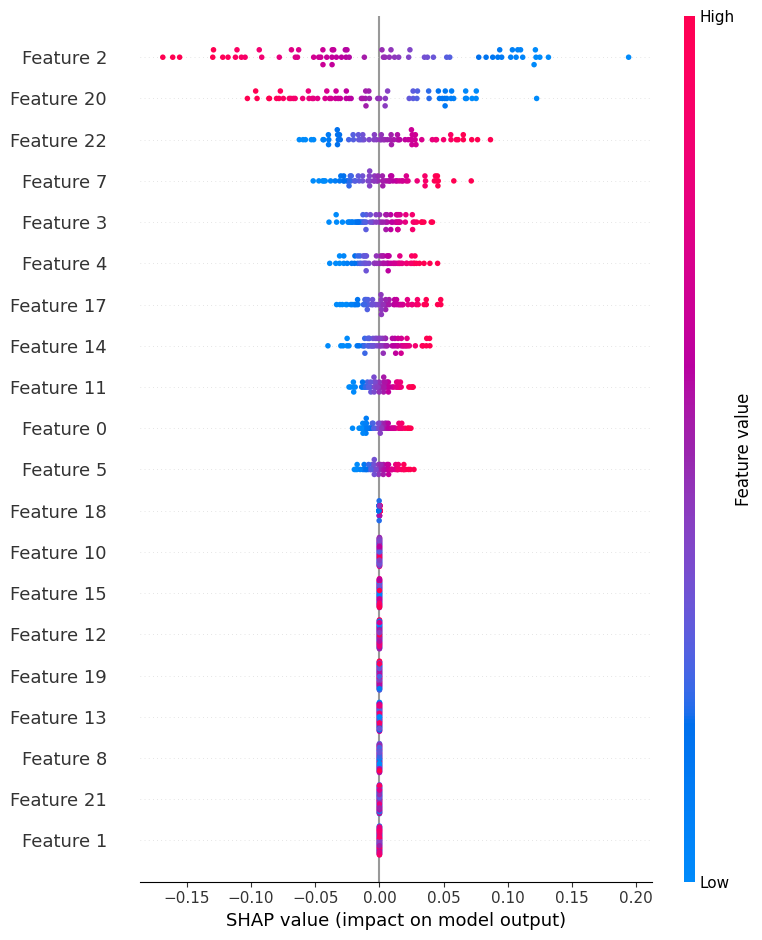

In [37]:
import numpy as np
import pandas as pd
import optuna
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load processed data
df = pd.read_csv("new_final_selected_features_after_vif.csv")
X = df.drop(columns=["vomitoxin_ppb"])
y = df["vomitoxin_ppb"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "RandomForest": RandomForestRegressor(n_estimators=300, max_depth=25, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=12, random_state=42),
    "Ridge": Ridge(alpha=0.5),
    "Lasso": Lasso(alpha=0.005),
    "SVR": SVR(kernel='rbf', C=2.0, epsilon=0.05)
}

# Train and evaluate models
results = {}
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    metrics[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Improved Neural Network Model
def build_nn():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return model

nn_model = build_nn()
nn_model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()
nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
nn_r2 = r2_score(y_test, y_pred_nn)
results["NeuralNetwork"] = nn_r2
metrics["NeuralNetwork"] = {"MAE": nn_mae, "RMSE": nn_rmse, "R2": nn_r2}
print(f"Neural Network - MAE: {nn_mae:.4f}, RMSE: {nn_rmse:.4f}, R2: {nn_r2:.4f}")

# Select best model
best_model_name = max(results, key=results.get)

if best_model_name == "NeuralNetwork":
    nn_model.save("best_nn_model.h5")
    print("Best Neural Network model saved as best_nn_model.h5")
else:
    print(f"Best Model: {best_model_name}")
    best_model = models[best_model_name]
    best_model.fit(X_train, y_train)
    joblib.dump(best_model, "best_model.pkl")
    print("Best model saved as best_model.pkl")

# Visual Evaluation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_model.predict(X_test), alpha=0.5, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted ({best_model_name})")
plt.show()

# Residual Analysis
residuals = y_test - best_model.predict(X_test)
sns.histplot(residuals, kde=True, color='red')
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Analysis")
plt.show()

# Model Interpretability using SHAP
explainer = shap.Explainer(best_model.predict, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
